In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb

데이터 불러오기

In [2]:
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

직접 원핫인코딩 하기

In [4]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [5]:
x_train.shape

(25000, 10000)

모델 구성하기

### 네트워크의 크기를 축소시켜서 시작

In [6]:
from tensorflow.keras import models, layers, Sequential

model = models.Sequential()
model.add(layers.Dense(6, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60006     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 60,055
Trainable params: 60,055
Non-trainable params: 0
_________________________________________________________________


모델 컴파일 하기

In [7]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

validation set 설정

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

훈련

In [9]:
small_history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5705 - accuracy: 0.7871 - val_loss: 0.4822 - val_accuracy: 0.8338
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3927 - accuracy: 0.8887 - val_loss: 0.3713 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3002 - accuracy: 0.9133 - val_loss: 0.3227 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2433 - accuracy: 0.9291 - val_loss: 0.2925 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2039 - accuracy: 0.9399 - val_loss: 0.2799 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1734 - accuracy: 0.9493 - val_loss: 0.2739 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1497 - accuracy: 0.9560 - val_loss: 0.2786 - val_accuracy: 0.8883
Epoch 8/20
30

결과 시각화

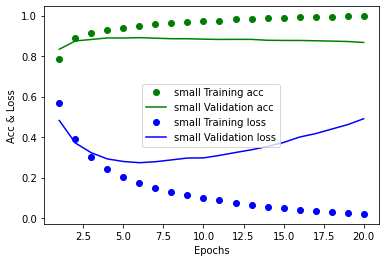

In [10]:
import matplotlib.pyplot as plt

small_history_dict = small_history.history
loss = small_history_dict['loss']
val_loss = small_history_dict['val_loss']
acc = small_history_dict['accuracy']
val_acc = small_history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'go', label = 'small Training acc')
plt.plot(epochs, val_acc, 'g', label = 'small Validation acc')
plt.plot(epochs, loss, 'bo', label = 'small Training loss')
plt.plot(epochs, val_loss, 'b', label = 'small Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Acc & Loss')
plt.legend()
plt.show()

### 일반적인 크기의 모델

In [11]:
from tensorflow.keras import models, layers, Sequential

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [13]:
normal_history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5200 - accuracy: 0.7795 - val_loss: 0.3916 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3063 - accuracy: 0.9040 - val_loss: 0.3027 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2195 - accuracy: 0.9307 - val_loss: 0.2789 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1717 - accuracy: 0.9442 - val_loss: 0.2750 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1407 - accuracy: 0.9551 - val_loss: 0.3170 - val_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1163 - accuracy: 0.9635 - val_loss: 0.2957 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0958 - accuracy: 0.9718 - val_loss: 0.3130 - val_accuracy: 0.8826
Epoch 8/20
30

### 일반적인 크기의 모델과 작은 모델의 성능 비교

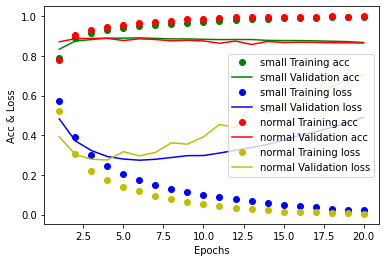

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

small_history_dict = small_history.history
small_loss = small_history_dict['loss']
small_val_loss = small_history_dict['val_loss']
small_acc = small_history_dict['accuracy']
small_val_acc = small_history_dict['val_accuracy']

normal_history_dict = normal_history.history
normal_loss = normal_history_dict['loss']
normal_val_loss = normal_history_dict['val_loss']
normal_acc = normal_history_dict['accuracy']
normal_val_acc = normal_history_dict['val_accuracy']

plt.plot(epochs, small_acc, 'go', label = 'small Training acc')
plt.plot(epochs, small_val_acc, 'g', label = 'small Validation acc')
plt.plot(epochs, small_loss, 'bo', label = 'small Training loss')
plt.plot(epochs, small_val_loss, 'b', label = 'small Validation loss')

plt.plot(epochs, normal_acc, 'ro', label = 'normal Training acc')
plt.plot(epochs, normal_val_acc, 'r', label = 'normal Validation acc')
plt.plot(epochs, normal_loss, 'yo', label = 'normal Training loss')
plt.plot(epochs, normal_val_loss, 'y', label = 'normal Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Acc & Loss')
plt.legend()
plt.show()

### 크기가 다른 두 모델의 검증 데이터에 대한 지표

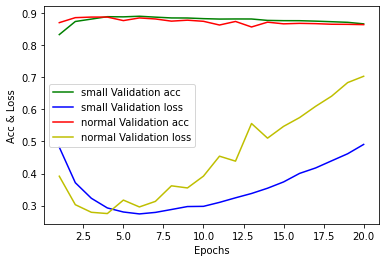

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

small_history_dict = small_history.history
small_val_loss = small_history_dict['val_loss']
small_val_acc = small_history_dict['val_accuracy']

normal_history_dict = normal_history.history
normal_val_loss = normal_history_dict['val_loss']
normal_val_acc = normal_history_dict['val_accuracy']

plt.plot(epochs, small_val_acc, 'g', label = 'small Validation acc')
plt.plot(epochs, small_val_loss, 'b', label = 'small Validation loss')

plt.plot(epochs, normal_val_acc, 'r', label = 'normal Validation acc')
plt.plot(epochs, normal_val_loss, 'y', label = 'normal Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Acc & Loss')
plt.legend()
plt.show()

### 크기가 과도하게 큰 모델

In [16]:
from tensorflow.keras import models, layers, Sequential

model = models.Sequential()
model.add(layers.Dense(1000, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1001      
Total params: 11,003,001
Trainable params: 11,003,001
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

big_history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6538 - accuracy: 0.7397 - val_loss: 0.3047 - val_accuracy: 0.8766
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2643 - accuracy: 0.8951 - val_loss: 0.2700 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1536 - accuracy: 0.9455 - val_loss: 0.3111 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.3599 - val_accuracy: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1335 - accuracy: 0.9758 - val_loss: 0.3211 - val_accuracy: 0.8931
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.4626 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 2.1751e-04 - accuracy: 1.0000 - val_loss: 0.5585 - val_accuracy: 0.8925
Epoch 8/2

### 세가지 크기의 모델 각각의 검증 데이터에 대한 지표

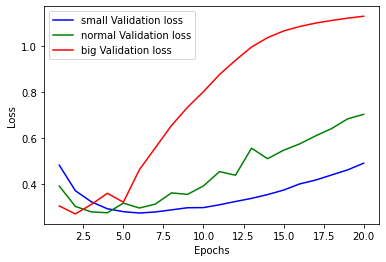

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

small_history_dict = small_history.history
small_val_loss = small_history_dict['val_loss']

normal_history_dict = normal_history.history
normal_val_loss = normal_history_dict['val_loss']

big_history_dict = big_history.history
big_val_loss = big_history_dict['val_loss']

plt.plot(epochs, small_val_loss, 'b', label = 'small Validation loss')

plt.plot(epochs, normal_val_loss, 'g', label = 'normal Validation loss')

plt.plot(epochs, big_val_loss, 'r', label = 'big Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

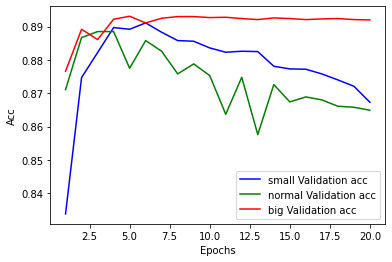

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

small_history_dict = small_history.history
small_val_acc = small_history_dict['val_accuracy']

normal_history_dict = normal_history.history
normal_val_acc = normal_history_dict['val_accuracy']

big_history_dict = big_history.history
big_val_acc = big_history_dict['val_accuracy']


plt.plot(epochs, small_val_acc, 'b', label = 'small Validation acc')

plt.plot(epochs, normal_val_acc, 'g', label = 'normal Validation acc')

plt.plot(epochs, big_val_acc, 'r', label = 'big Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### 크기가 큰 모델의 훈련셋과 검증셋에 대한 비교

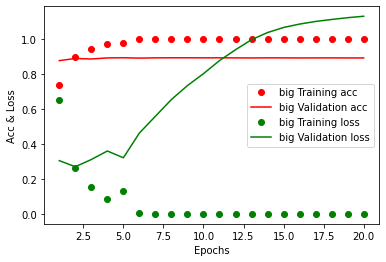

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

big_history_dict = big_history.history
big_loss = big_history_dict['loss']
big_val_loss = big_history_dict['val_loss']
big_acc = big_history_dict['accuracy']
big_val_acc = big_history_dict['val_accuracy']

plt.plot(epochs, big_acc, 'ro', label = 'big Training acc')
plt.plot(epochs, big_val_acc, 'r', label = 'big Validation acc')
plt.plot(epochs, big_loss, 'go', label = 'big Training loss')
plt.plot(epochs, big_val_loss, 'g', label = 'big Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Acc & Loss')
plt.legend()
plt.show()